In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf


In [2]:
start = '2010-01-01'
end = '2023-12-01'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [5]:
columns_to_drop = ['Date','Adj Close']
df = df.drop(columns=columns_to_drop, errors='ignore')

df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


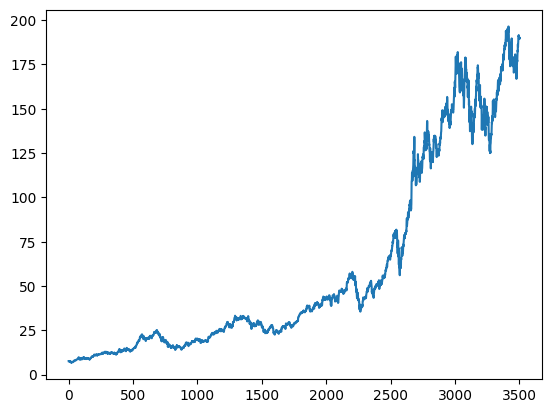

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3497    181.560901
3498    181.540701
3499    181.537901
3500    181.545501
3501    181.564201
Name: Close, Length: 3502, dtype: float64

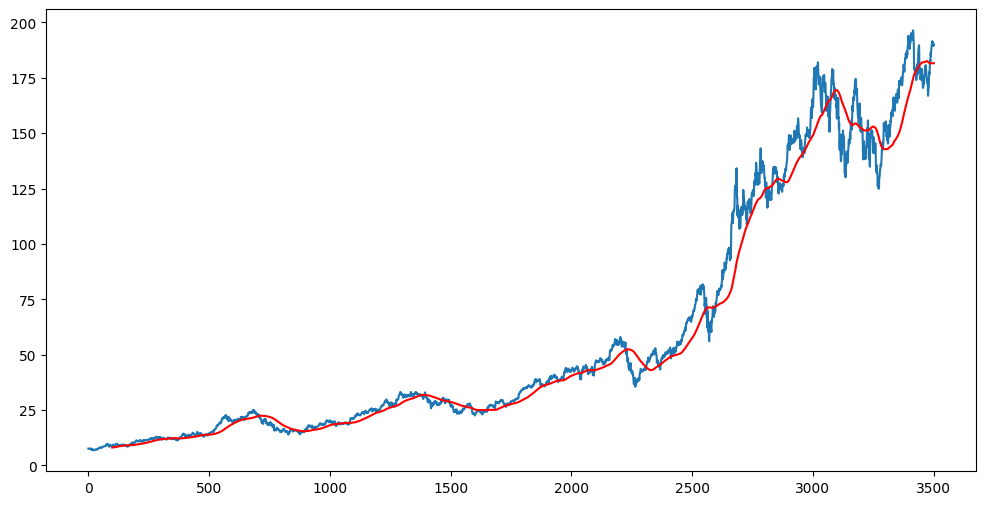

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3497    174.33470
3498    174.52930
3499    174.72625
3500    174.90385
3501    175.08760
Name: Close, Length: 3502, dtype: float64

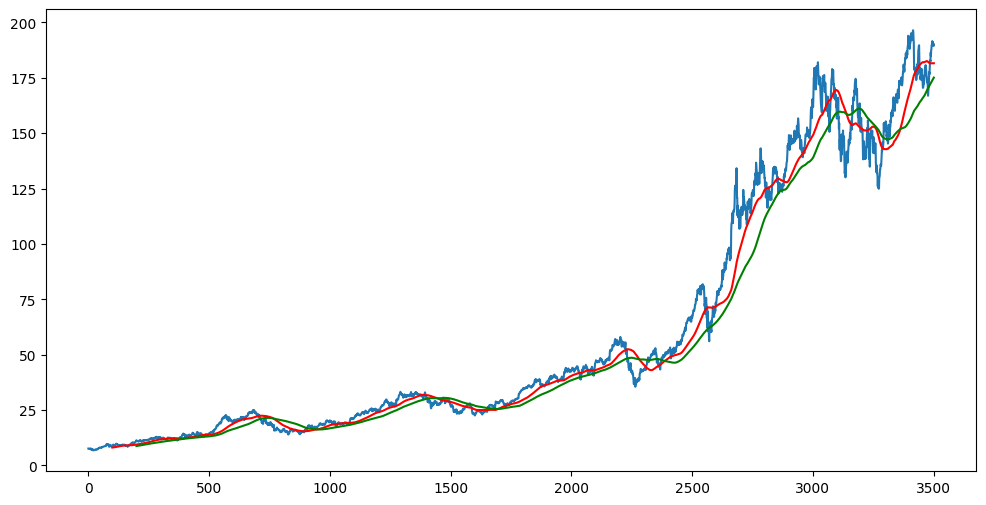

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3502, 5)

In [11]:
#Splitting Data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2451, 1)
(1051, 1)


In [12]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:
data_testing.head()

,Close
2451,55.992500
2452,56.147499
2453,54.740002
2454,55.205002
2455,56.752499


In [37]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array=scalar.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.94605006],
       [0.94047915],
       [0.93525034]])

In [21]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [13]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True , input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu',return_sequences=True ))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
74/74 [==============================] - 28s 305ms/step - loss: 0.0280
Epoch 2/50
74/74 [==============================] - 24s 324ms/step - loss: 0.0067
Epoch 3/50
74/74 [==============================] - 22s 291ms/step - loss: 0.0069
Epoch 4/50
74/74 [==============================] - 23s 310ms/step - loss: 0.0058
Epoch 5/50
74/74 [==============================] - 21s 288ms/step - loss: 0.0055
Epoch 6/50
74/74 [==============================] - 23s 313ms/step - loss: 0.0047
Epoch 7/50
74/74 [==============================] - 23s 310ms/step - loss: 0.0047
Epoch 8/50
74/74 [==============================] - 21s 288ms/step - loss: 0.0044
Epoch 9/50
74/74 [==============================] - 23s 309ms/step - loss: 0.0039
Epoch 10/50
74/74 [==============================] - 22s 293ms/step - loss: 0.0042
Epoch 11/50
74/74 [==============================] - 22s 300ms/step - loss: 0.0038
Epoch 12/50
74/74 [==============================] - 23s 311ms/step - loss: 0.0036
Epoch 13/50
7

In [30]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
past_100_days=data_training.tail(100)

In [34]:
final_df=past_100_days.append(data_testing, ignore_index=True)

<ipython-input-34-bda026c18f6e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [38]:
input_data=scalar.fit_transform(final_df)
input_data

array([[0.04832652],
       [0.04476735],
       [0.03898774],
       ...,
       [0.96048978],
       [0.95376325],
       [0.95755102]])

In [39]:
input_data.shape

(1151, 1)

In [40]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [41]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1051, 100, 1)
(1051,)


In [42]:
# making prediction
y_predicted=model.predict(x_test)

33/33 [==============================] - 3s 79ms/step


In [43]:
y_predicted

array([[0.10874711],
       [0.10954225],
       [0.11030756],
       ...,
       [0.9043664 ],
       [0.9049339 ],
       [0.9044508 ]], dtype=float32)

In [44]:
scalar.scale_

array([0.00653061])

In [45]:
scale_factor=1/0.0065306
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

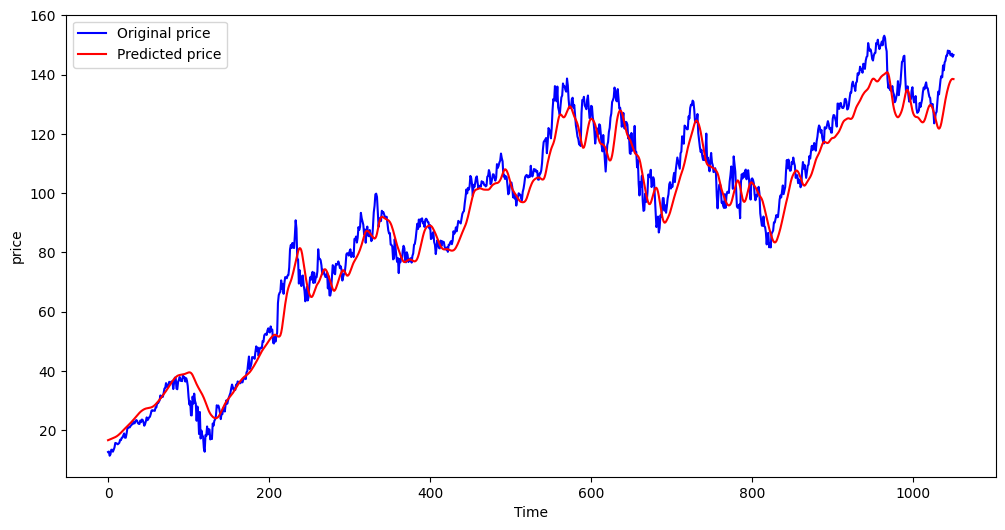

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()